# Deep Learning with Python

Working through Chapter 4, IMDB binary classification.

This example is meant to introduce the reader to mechanics of how to create a binary classifier using Tensorflow/Keras.

This notebook will contain much of the original material plus some enhancements.

Note the following:

* We ask for the 10,000 most frequent occuring words

* From the data set it appears that stopwords were included - which occur frequently - and add noise

* We create a naive vectorization of the review by creating a word existence vector.  The vector is the length of the vocabulary, in this case 10,000, where each column represents a word in the vocabulary.  If the word exists in the review then a '1' is placed in that column.  Note that this is just an existence vector and it does not count the occurence of the word in the review nor does it perform a word importance such as TF-IDF.  

* While this is a good exercise to understand binary classification in Keras, this is not how you would perform sentiment analysis in the real world.

* We should not expect this approach to perform well.



In [302]:
import pandas as pd
from tensorflow.keras.datasets import imdb
import random
import numpy as np
from collections import Counter

In [303]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [304]:
train_data.shape


(25000,)

In [305]:
test_data.shape

(25000,)

In [306]:
# a row from the training or test data represents a review.  The review has had the words encoded as an index
# into a word lookup
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

Notice that many of the words are repeated in the review, but the vectorization we use only cares about the existence.  Not the count nor ratio of word frequency to document counts.

In [307]:
print("(Word Index, Word Count)")
Counter(train_data[0]).most_common(10)

(Word Index, Word Count)


[(4, 15),
 (16, 11),
 (5, 9),
 (22, 6),
 (2, 6),
 (12, 6),
 (43, 4),
 (36, 4),
 (25, 4),
 (38, 4)]

In [308]:
# word_index = dict(word, index)
word_2_index = imdb.get_word_index()

In [309]:
word_2_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [310]:
word_2_index['unknown']

1856

Reverse the lookup so that we can provide an index, and get the word at the index back.

In [311]:
index_2_word = dict([(value, key) for key, value in imdb.get_word_index().items()])

In [312]:
index_2_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [313]:
index_2_word[1]

'the'

The `construct_review` function, will take a row, i.e. a review of numbers, and convert that back to the actual review.  

The book stated that we need to take the index - 3, because 0.1.2 are reserved but that is not what I found to be the case.

In [314]:
def construct_review(row, offset=0): 
    # the Book stated the following below, but that was not my experience.  Author would have had offset=3
    # I believe the offset should be zero
    # NOTE indices are offset by 3 because 0,1,2 are reserved indices for "padding",
    # "start of sequence" and "unknown".  
    
    review = " ".join(index_2_word.get(i-offset, "?") for i in row)
    return review
    

In [315]:
rand_index = random.randint(0, 25000)
rand_index=1101
print("Sample Index: ", rand_index)
print(construct_review(train_data[rand_index]))
print("Positive [1], Negative [0]: ", train_labels[rand_index])

Sample Index:  1101
the darren redneck later tone to and moving of accompanying and innocent this darren this of darren teens comedic than and to alexandra in and mcintire who of and should movie and to and but and of and and fate table and to and others hero's movie is effect cheap hero's should movie though br of and and and of and and and to and he although unfortunately of extremely and mcintire br of tormented plot much extremely fierce bank should movie and and to damage he although it's one they by my photographer i i and of cheap darren although they is hooked trek nearly and this and it and this is try nudity f happen aspect father's extremely movie of and darren concern prey and columbo and bring participation gas needed safe moon and eater arc importantly and to and fat and of i've redneck later ways is again films strangely to it's cannot of ways this seem hill camera film teach because redneck entirety from 1960's in accused mcintire layers of tormented to connected but an

Multi-Hot Encode the reviews into a feature set of 10000 columns, where each column represents a word in the possible set of 10,000 with a 1 where the word exists in the review and a 0 where it does not

In [316]:
feature_dimension = 10000

In [317]:
def vectorize_sequences(sequences, dimension = feature_dimension):
    # create an matrix of zeros where the number of rows equals the number of reviews (rows)
    # in the sequence
    # and the number of columns equals the maximum number of words we selected from IMDB dataset which
    # is 10,000
    results = np.zeros((len(sequences), dimension))
    for row, review_sequence in enumerate(sequences):
        for word_col_index in review_sequence:
            if word_col_index <= dimension:
                results[row, word_col_index] = 1.0
            # else
            # word index is greater than our dimension
            # the index of the word is greater than the dimension, so just ignore it and leave it as zero.
    return results

In [318]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [319]:
# 25000 rows
# each row has 10000 columns.  A column for each word in our vocabulary
# in each column there will be a 1, if the word was in a rows review string
X_train.shape

(25000, 10000)

In [320]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [321]:
y_train = np.asarray(train_labels).astype("float32")

In [322]:
y_test = np.asarray(test_labels).astype("float32")

In [323]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [324]:
y_train.shape

(25000,)

In [325]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [326]:
train_labels.shape

(25000,)

## Build Model

In [327]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [328]:
model = Sequential()
model.add(Dense(units=16, input_shape=(feature_dimension,), activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [329]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [330]:
history = model.fit(X_train[10000:], y_train[10000:], epochs=20, batch_size=512, validation_data=(X_train[:10000], y_train[:10000]))

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5105 - accuracy: 0.7809 - val_loss: 0.3907 - val_accuracy: 0.8615
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3055 - accuracy: 0.9021 - val_loss: 0.3144 - val_accuracy: 0.8806
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2279 - accuracy: 0.9260 - val_loss: 0.2796 - val_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1812 - accuracy: 0.9412 - val_loss: 0.2732 - val_accuracy: 0.8904
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1473 - accuracy: 0.9541 - val_loss: 0.3003 - val_accuracy: 0.8803
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1223 - accuracy: 0.9631 - val_loss: 0.2911 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1041 - accuracy: 0.9703 - val_loss: 0.3077 - val_accuracy: 0.8842
Epoch 8/20
30

In [331]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                160016    
                                                                 
 dense_31 (Dense)            (None, 16)                272       
                                                                 
 dense_32 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [332]:
losses = pd.DataFrame(history.history)
losses.head()


,loss,accuracy,val_loss,val_accuracy
0,0.510494,0.780933,0.390692,0.8615
1,0.305538,0.902133,0.314431,0.8806
2,0.227926,0.926000,0.279598,0.8904
3,0.181240,0.941200,0.273182,0.8904
4,0.147253,0.954067,0.300290,0.8803


<AxesSubplot:>

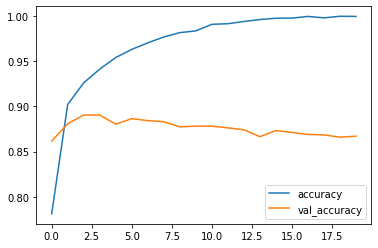

In [333]:
losses[['accuracy','val_accuracy']].plot()


<AxesSubplot:>

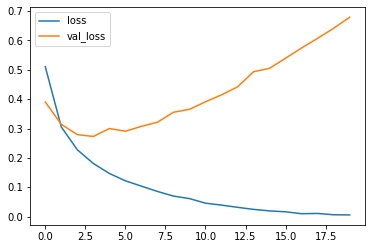

In [334]:
losses[['loss','val_loss']].plot()

In [335]:
eval_results = model.evaluate(X_test, y_test)

782/782 [==============================] - 1s 913us/step - loss: 0.7367 - accuracy: 0.8515


In [336]:
# Even with significant overfitting, we are able to predict the postive/negative review 85% of the time
eval_results

[0.7366886138916016, 0.8515200018882751]

# Ways to address overfitting 

* Create a simpiler model with fewer parameters


* Add Regularization using tensorflow.keras.regularizers.[l1 | l2 | l1_l2]


* Add Dropout layers

This should help with overfitting.  In this section will will look at dropout layers.

A Dropout layer will randomly zero out weights, making it much more difficult for the model to learn just the pattern in the training data.  This will allow the model to generalize better to patterns it has not seen before.  

It essentially introduces a bit of noise to the model and keeps the model from only considering a single way to adjust the weights.

In [337]:
from tensorflow.keras.layers import Dropout

In [338]:
model = Sequential()
model.add(Dense(units=16, input_shape=(feature_dimension,), activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train[10000:], y_train[10000:], epochs=20, batch_size=512, validation_data=(X_train[:10000], y_train[:10000]))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6318 - accuracy: 0.6343 - val_loss: 0.5421 - val_accuracy: 0.8404
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5180 - accuracy: 0.7712 - val_loss: 0.4234 - val_accuracy: 0.8762
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4398 - accuracy: 0.8288 - val_loss: 0.3659 - val_accuracy: 0.8859
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3788 - accuracy: 0.8637 - val_loss: 0.3225 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3277 - accuracy: 0.8892 - val_loss: 0.3035 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2871 - accuracy: 0.9072 - val_loss: 0.2837 - val_accuracy: 0.8914
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2532 - accuracy: 0.9180 - val_loss: 0.2809 - val_accuracy: 0.8881
Epoch 8/20
30

In [339]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 16)                160016    
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_34 (Dense)            (None, 16)                272       
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [340]:
losses_dropout = pd.DataFrame(history.history)



<AxesSubplot:>

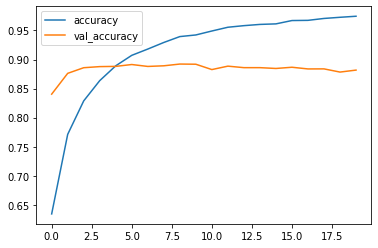

In [341]:
losses_dropout[['accuracy','val_accuracy']].plot()



<AxesSubplot:>

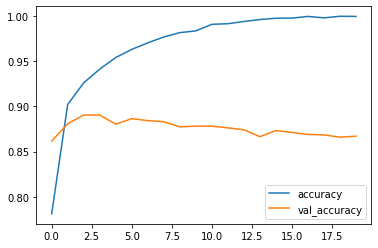

In [342]:
losses[['accuracy','val_accuracy']].plot()



<AxesSubplot:>

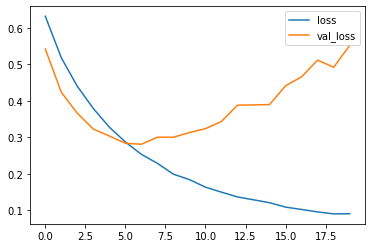

In [343]:
losses_dropout[['loss','val_loss']].plot()

<AxesSubplot:>

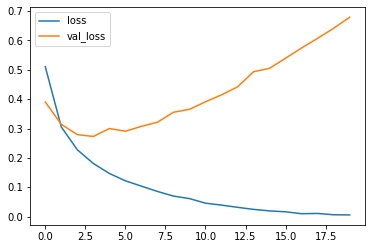

In [344]:
losses[['loss','val_loss']].plot()

We can see from the charts above that using a Dropout layer helped with the overfitting problem. The accuracy improved by 3%.  

There is still much that can be done to improve the model

In [345]:
eval_results = model.evaluate(X_test, y_test)
eval_results

782/782 [==============================] - 1s 943us/step - loss: 0.6073 - accuracy: 0.8697


[0.6073319315910339, 0.8697199821472168]

## Write our own review

In [346]:
review = "the lamp broke after turning it on twice I need a lamp to last longer"
# review = "i loved the taste and the service was wonderful"

In [347]:
# Take a string review, and convert it into a list of word indexes
def review_to_word_index_list(review:str):
    # please no punctionation and use lower case
    review = review.lower()
    word_indexes = [ word_2_index[w] for w in review.split(" ")]
    return word_indexes



In [348]:
review_index_list = review_to_word_index_list(review)

In [349]:
review_index_list

[1, 13152, 3092, 100, 1584, 9, 20, 1450, 10, 356, 3, 13152, 5, 233, 1204]

In [350]:
constructed_review = construct_review(review_index_list, offset=0)
constructed_review

'the lamp broke after turning it on twice i need a lamp to last longer'

In [351]:
index_2_word[13152] # this index is out of vocabulary and will be ignored when converted

'lamp'

In [352]:
review_vector = vectorize_sequences([review_index_list])

In [353]:
review_vector

array([[0., 1., 0., ..., 0., 0., 0.]])

In [354]:
model.predict([review_vector])

array([[0.2632658]], dtype=float32)

# Wrap up

The purpose of this notebook was to provide a first look at binary classification problems and how to apply a Keras sequential neural network.  

We also looked at the notion of overfitting, and looked at one way to help address the overfitting problem.
